In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
%matplotlib inline 

In [2]:
chemin = os.getcwd()

In [3]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

# I - __Première lecture de nos données__
<span style="color:red">-> voir plus bas pour la suite</span>

In [4]:
NYSE = pd.read_csv(chemin+"/data/WIKI_PRICES_212b326a081eacca455e13140d7bb9db.csv")

In [5]:
NYSE.head(6)

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
0,A,1999-11-18,45.50,50.00,40.00,44.00,44739900.0,0.0,1.0,31.041951,34.112034,27.289627,30.018590,44739900.0
1,A,1999-11-19,42.94,43.00,39.81,40.38,10897100.0,0.0,1.0,29.295415,29.336350,27.160002,27.548879,10897100.0
2,A,1999-11-22,41.31,44.00,40.06,44.00,4705200.0,0.0,1.0,28.183363,30.018590,27.330562,30.018590,4705200.0
3,A,1999-11-23,42.50,43.63,40.25,40.25,4274400.0,0.0,1.0,28.995229,29.766161,27.460188,27.460188,4274400.0
4,A,1999-11-24,40.13,41.94,40.00,41.06,3464400.0,0.0,1.0,27.378319,28.613174,27.289627,28.012803,3464400.0
5,A,1999-11-26,40.88,41.50,40.75,41.19,1237100.0,0.0,1.0,27.889999,28.312988,27.801308,28.101494,1237100.0


In [ ]:
df_list = []

for stock in NYSE["ticker"].unique():
    try:
        tmp = NYSE[NYSE["ticker"]==stock]
        tmp.set_index("date", inplace=True)
        tmp = tmp.loc[:, "close"]
        tmp.rename(stock, inplace=True)
        df_list.append(tmp)
    except:
        pass

### Sauvegarde des données brutes retraitées

In [ ]:
pickle.dump(df_list, open("[TEMP]df_list", "wb"))

<span style="color:yellow">-------------------------</span>  
<span style="color:yellow">-------------------------</span>  

# II - __Chargement de nos données__

In [6]:
df_list = pickle.load(open('data/[TEMP]df_list', 'rb'))

In [7]:
df_base = pd.concat(df_list, axis=1, sort=False)
df_base.head(3)

,A,AA,AAL,AAMC,AAN,AAOI,AAON,AAP,AAPL,AAT,AAWW,ABAX,ABBV,ABC,ABCB,ABCO,ABFS,ABG,ABM,ABMD,ABT,ACAD,ACAS,ACAT,ACC,...,YRCW,YUM,YUME,Z,ZAGG,ZAZA,ZBH,ZBRA,ZEN,ZEP,ZEUS,ZGNX,ZIGO,ZINC,ZION,ZIOP,ZIXI,ZLC,ZLTQ,ZMH,ZNGA,ZOES,ZQK,ZTS,ZUMZ
1999-11-18,44.00,NaN,NaN,NaN,17.50,NaN,13.0,NaN,89.62,NaN,NaN,4.969,NaN,13.81,13.50,NaN,14.19,NaN,21.94,28.00,38.00,NaN,20.38,10.25,NaN,...,17.31,43.13,NaN,NaN,NaN,4.13,NaN,62.13,NaN,NaN,5.25,NaN,17.88,NaN,64.50,NaN,42.5,47.31,NaN,NaN,NaN,NaN,15.44,NaN,NaN
1999-11-19,40.38,NaN,NaN,NaN,17.50,NaN,13.0,NaN,92.44,NaN,NaN,4.875,NaN,13.69,13.63,NaN,14.50,NaN,21.50,29.00,37.50,NaN,19.88,10.25,NaN,...,17.06,42.50,NaN,NaN,NaN,4.13,NaN,62.63,NaN,NaN,5.00,NaN,18.12,NaN,64.63,NaN,41.5,47.50,NaN,NaN,NaN,NaN,15.44,NaN,NaN
1999-11-22,44.00,NaN,NaN,NaN,16.75,NaN,13.0,NaN,90.62,NaN,NaN,4.938,NaN,13.25,12.88,NaN,14.56,NaN,21.44,28.25,38.88,NaN,20.19,10.19,NaN,...,17.06,41.81,NaN,NaN,NaN,4.25,NaN,61.69,NaN,NaN,5.00,NaN,18.81,NaN,63.81,NaN,49.0,47.25,NaN,NaN,NaN,NaN,15.19,NaN,NaN


# III - __Retraitement de nos données brutes__

Clean du dataframe (357, 2491)

In [8]:
def construction_df(df, debut_form, fin_form):
    df_formation = df.loc[debut_form:fin_form, :].copy()
    df_formation.dropna(axis=1, how="all", inplace=True)
    return df_formation

In [9]:
df_complet = construction_df(df_base, '2008-02-01', '2009-07-01')

l = []
for i in range(df_complet.shape[0]):
    if df_complet.iloc[i,:].isna().sum() <= 2000:
        l.append(i)

df_complet = df_complet.iloc[l, :]
df_complet.dropna(axis=1, how="any", inplace=True)

In [10]:
df_complet.shape

(357, 2492)

In [11]:
del df_base

# IV - __Distinction de la période de formation et de la période de trading__

In [12]:
df_formation = df_complet.loc[:'2008-31-01', :]
df_trading = df_complet.loc['2009-01-01':, :]

In [13]:
df_formation.shape, df_trading.shape

((232, 2492), (125, 2492))

In [14]:
df_formation.head(3)

,A,AAL,AAN,AAON,AAP,AAPL,AAWW,ABAX,ABC,ABCB,ABCO,ABFS,ABG,ABM,ABMD,ABT,ACAD,ACAS,ACAT,ACC,ACCL,ACCO,ACE,ACET,ACFN,...,XPO,XRAY,XRM,XRX,XXIA,Y,YHOO,YORW,YRCW,YUM,ZAGG,ZAZA,ZBH,ZBRA,ZEP,ZEUS,ZIGO,ZINC,ZION,ZIOP,ZIXI,ZLC,ZMH,ZQK,ZUMZ
2008-02-01,34.46,15.39,17.05,18.64,36.47,133.75,49.95,30.00,46.63,15.49,64.23,29.90,14.97,20.30,15.26,57.55,12.80,35.79,10.11,28.84,6.23,14.11,59.32,7.32,5.60,...,1.15,41.18,5.02,15.79,7.61,374.71,28.38,15.59,17.51,35.24,0.80,9.87,79.180000,31.89,17.41,35.34,12.11,15.40,55.35,3.01,3.70,17.38,79.18,9.53,20.04
2008-02-04,34.46,14.46,17.00,17.82,36.35,131.65,49.91,29.46,47.29,15.40,63.60,28.51,14.84,20.00,15.00,58.05,13.38,36.15,9.47,28.99,6.29,13.80,59.58,7.05,5.41,...,1.22,41.13,5.19,15.47,7.35,380.00,29.33,15.31,17.40,35.81,0.75,9.77,77.510002,31.04,16.51,35.55,11.99,14.98,53.50,3.30,3.72,17.57,77.51,8.91,20.29
2008-02-05,33.59,14.55,16.85,16.94,35.03,129.36,49.53,27.45,46.19,15.03,61.16,27.76,14.50,19.57,14.50,57.34,11.75,34.05,9.06,29.15,5.98,13.16,58.30,6.81,5.32,...,1.20,40.01,5.02,15.23,7.00,367.50,28.98,15.30,18.15,34.76,0.78,9.45,76.919998,31.03,15.99,34.49,11.87,14.00,52.18,3.20,3.63,16.75,76.92,8.50,19.02


In [15]:
del df_complet

### Sauvegarde des données finales

In [18]:
pickle.dump(df_complet, open(chemin+"/data/[TEMP]df_complet", "wb"))
pickle.dump(df_formation, open(chemin+"/data/[TEMP]df_formation", "wb"))
pickle.dump(df_trading, open(chemin+"/data/[TEMP]df_trading", "wb"))

In [16]:
df_complet = pickle.load(open(chemin+'/data/[TEMP]df_complet', 'rb'))
df_formation = pickle.load(open(chemin+'/data/[TEMP]df_formation', 'rb'))
df_trading = pickle.load(open(chemin+'/data/[TEMP]df_trading', 'rb'))

<span style="color:yellow">-------------------------</span>  
<span style="color:yellow">-------------------------</span>  

# V - __Normalisation des prix et formation de nos paires__

### Normalisation des prix à 1$ en début de période

In [17]:
def normalisation_prix(df):
    return df.div(df.iloc[0,:], axis=1)

In [18]:
df_formation=normalisation_prix(df_formation)
df_trading=normalisation_prix(df_trading)

### Formation de nos paires par calcule de la sommme des spreads mis au carré de cette paire - SSE

In [19]:
def sum_squared_deviation(df, s1, s2):
    return ((df[s1] - df[s2])**2).sum(), (df[s1] - df[s2]).std()

* __Notre algorithm va sélectionner pour chaque actifs, l'actif parmis les 2491 autres actifs minimisant le SSE.__  
Cette méthode de sélection est l'appproche préconisée par _Gatev et al. (2006)_.  
(PS : Notre sélection des paires d'actifs ignore le secteur d'activité des entreprises)

In [20]:
def pairs_formation(df, verbose=True):
    pairs = []
    for i in df.columns:
        min_ssd = np.inf
        for j in df.drop(columns=i).columns:
            ssd, std = sum_squared_deviation(df, i, j)
            if ssd<min_ssd:
                min_ssd = ssd
                best_j = j
                std_best_j = std
        pairs.append((i, best_j, round(min_ssd,2), round(std_best_j, 4)))
        
    df_pairs = pd.DataFrame(pairs, columns=["S1", "S2", "SSD", "std"])
    df_pairs.sort_values(by=["SSD"], inplace=True)
    df_pairs.drop_duplicates(subset="SSD", keep="first", inplace=True)
    
    top5 = df_pairs.iloc[:5,:]
    top20 = df_pairs.iloc[:20,:]
    top100 = df_pairs.iloc[:100,:]
    top5.set_index([pd.Index(np.arange(1,6))], inplace=True)
    top20.set_index([pd.Index(np.arange(1,21))], inplace=True)
    top100.set_index([pd.Index(np.arange(1,101))], inplace=True)
    
    if verbose:
        print("Top 10 :\n\n", df_pairs.head(10), "\n\n\nBottom 10 :\n\n", df_pairs.tail(10))
    
    return top5, top20, top100, df_pairs

In [32]:
top5, top20, top100, all_pairs = pairs_formation(df_formation)

Top 10 :

          S1     S2   SSD     std
2086    SSS    LSI  0.00  0.0000
339   BRK_A  BRK_B  0.01  0.0071
901     FOX   FOXA  0.02  0.0086
1290     KW    ARR  0.03  0.0083
484   CMCSA  CMCSK  0.04  0.0115
53      AEP    AEE  0.18  0.0271
1216    ITW    EFX  0.19  0.0285
1968    SCG    WEC  0.20  0.0288
196     ATO     ES  0.21  0.0303
2324    UTX  HUB_B  0.23  0.0314 


Bottom 10 :

         S1    S2       SSD      std
918   FSYS  KIRK    113.20   0.6861
870   FINL  MILL    163.87   0.8421
2181  THLD  NPSP    189.99   0.8967
195   ATNY  STSI    368.15   1.2440
351    BTX  FSYS    826.36   1.6721
1882   REV   BTX   2707.33   3.3764
1649  OGXI   BTX   3346.03   3.6048
1876   REI   BTX   5849.55   3.3402
470   CLDX   REI  25837.24   7.8353
2159  TEAR   REI  42724.70  13.1891


### Sauvegarde des paires

In [133]:
pickle.dump(top5, open(chemin+"/output/[TEMP]top5", "wb"))
pickle.dump(top20, open(chemin+"/output/[TEMP]top20", "wb"))
pickle.dump(top100, open(chemin+"/output/[TEMP]top100", "wb"))
pickle.dump(all_pairs, open(chemin+"/output/[TEMP]all_pairs", "wb"))

In [21]:
top5 = pickle.load(open(chemin+'/output/[TEMP]top5', 'rb'))
top20 = pickle.load(open(chemin+'/output/[TEMP]top20', 'rb'))
top100 = pickle.load(open(chemin+'/output/[TEMP]top100', 'rb'))
all_pairs = pickle.load(open(chemin+'/output/[TEMP]all_pairs', 'rb'))

<span style="color:yellow">-------------------------</span>  
<span style="color:yellow">-------------------------</span>  

In [22]:
top5

,S1,S2,SSD,std
1,SSS,LSI,0.00,0.0000
2,BRK_A,BRK_B,0.01,0.0071
3,FOX,FOXA,0.02,0.0086
4,KW,ARR,0.03,0.0083
5,CMCSA,CMCSK,0.04,0.0115


In [23]:
all_pairs.iloc[200:205,:]

,S1,S2,SSD,std
463,CIX,GBLI,2.14,0.0961
1723,PDLI,ANH,2.15,0.0965
2137,SYX,STMP,2.16,0.0965
2017,SIMG,GRC,2.17,0.0967
1628,NXTM,SIGM,2.18,0.0969


In [24]:
df_formation.shape

(232, 2492)

In [25]:
def constr_pf(df, top, nb=5):
    
    if nb == 5:
        pf1 = (df[list(top.iloc[0, [0, 1]])]/df[list(top.iloc[0, [0, 1]])].iloc[0,:])
        pf2 = (df[list(top.iloc[1, [0, 1]])]/df[list(top.iloc[1, [0, 1]])].iloc[0,:])
        pf3 = (df[list(top.iloc[2, [0, 1]])]/df[list(top.iloc[2, [0, 1]])].iloc[0,:])
        pf4 = (df[list(top.iloc[3, [0, 1]])]/df[list(top.iloc[3, [0, 1]])].iloc[0,:])
        pf5 = (df[list(top.iloc[4, [0, 1]])]/df[list(top.iloc[4, [0, 1]])].iloc[0,:])
        return pf1, pf2, pf3, pf4, pf5
    
    if nb == 20:
        
        pf1 = (df[list(top.iloc[0, [0, 1]])]/df[list(top.iloc[0, [0, 1]])].iloc[0,:])
        pf2 = (df[list(top.iloc[1, [0, 1]])]/df[list(top.iloc[1, [0, 1]])].iloc[0,:])
        pf3 = (df[list(top.iloc[2, [0, 1]])]/df[list(top.iloc[2, [0, 1]])].iloc[0,:])
        pf4 = (df[list(top.iloc[3, [0, 1]])]/df[list(top.iloc[3, [0, 1]])].iloc[0,:])
        pf5 = (df[list(top.iloc[4, [0, 1]])]/df[list(top.iloc[4, [0, 1]])].iloc[0,:])
        pf6 = (df[list(top.iloc[5, [0, 1]])]/df[list(top.iloc[5, [0, 1]])].iloc[0,:])
        pf7 = (df[list(top.iloc[6, [0, 1]])]/df[list(top.iloc[6, [0, 1]])].iloc[0,:])
        pf8 = (df[list(top.iloc[7, [0, 1]])]/df[list(top.iloc[7, [0, 1]])].iloc[0,:])
        pf9 = (df[list(top.iloc[8, [0, 1]])]/df[list(top.iloc[8, [0, 1]])].iloc[0,:])
        pf10 = (df[list(top.iloc[9, [0, 1]])]/df[list(top.iloc[9, [0, 1]])].iloc[0,:])
        pf11 = (df[list(top.iloc[10, [0, 1]])]/df[list(top.iloc[10, [0, 1]])].iloc[0,:])
        pf12 = (df[list(top.iloc[11, [0, 1]])]/df[list(top.iloc[11, [0, 1]])].iloc[0,:])
        pf13 = (df[list(top.iloc[12, [0, 1]])]/df[list(top.iloc[12, [0, 1]])].iloc[0,:])
        pf14 = (df[list(top.iloc[13, [0, 1]])]/df[list(top.iloc[13, [0, 1]])].iloc[0,:])
        pf15 = (df[list(top.iloc[14, [0, 1]])]/df[list(top.iloc[14, [0, 1]])].iloc[0,:])
        pf16 = (df[list(top.iloc[15, [0, 1]])]/df[list(top.iloc[15, [0, 1]])].iloc[0,:])
        pf17 = (df[list(top.iloc[16, [0, 1]])]/df[list(top.iloc[16, [0, 1]])].iloc[0,:])
        pf18 = (df[list(top.iloc[17, [0, 1]])]/df[list(top.iloc[17, [0, 1]])].iloc[0,:])
        pf19 = (df[list(top.iloc[18, [0, 1]])]/df[list(top.iloc[18, [0, 1]])].iloc[0,:])
        pf20 = (df[list(top.iloc[19, [0, 1]])]/df[list(top.iloc[19, [0, 1]])].iloc[0,:])

        return pf1, pf2, pf3, pf4, pf5, pf6, pf7, pf8, pf9, pf10, pf11, pf12, pf13, pf14, pf15, pf16, pf17, pf18, pf19, pf20
    
    if nb == 100:
        
        pf1 = (df[list(top.iloc[0, [0, 1]])]/df[list(top.iloc[0, [0, 1]])].iloc[0,:])
        pf2 = (df[list(top.iloc[1, [0, 1]])]/df[list(top.iloc[1, [0, 1]])].iloc[0,:])
        pf3 = (df[list(top.iloc[2, [0, 1]])]/df[list(top.iloc[2, [0, 1]])].iloc[0,:])
        pf4 = (df[list(top.iloc[3, [0, 1]])]/df[list(top.iloc[3, [0, 1]])].iloc[0,:])
        pf5 = (df[list(top.iloc[4, [0, 1]])]/df[list(top.iloc[4, [0, 1]])].iloc[0,:])
        pf6 = (df[list(top.iloc[5, [0, 1]])]/df[list(top.iloc[5, [0, 1]])].iloc[0,:])
        pf7 = (df[list(top.iloc[6, [0, 1]])]/df[list(top.iloc[6, [0, 1]])].iloc[0,:])
        pf8 = (df[list(top.iloc[7, [0, 1]])]/df[list(top.iloc[7, [0, 1]])].iloc[0,:])
        pf9 = (df[list(top.iloc[8, [0, 1]])]/df[list(top.iloc[8, [0, 1]])].iloc[0,:])
        pf10 = (df[list(top.iloc[9, [0, 1]])]/df[list(top.iloc[9, [0, 1]])].iloc[0,:])
        pf11 = (df[list(top.iloc[10, [0, 1]])]/df[list(top.iloc[10, [0, 1]])].iloc[0,:])
        pf12 = (df[list(top.iloc[11, [0, 1]])]/df[list(top.iloc[11, [0, 1]])].iloc[0,:])
        pf13 = (df[list(top.iloc[12, [0, 1]])]/df[list(top.iloc[12, [0, 1]])].iloc[0,:])
        pf14 = (df[list(top.iloc[13, [0, 1]])]/df[list(top.iloc[13, [0, 1]])].iloc[0,:])
        pf15 = (df[list(top.iloc[14, [0, 1]])]/df[list(top.iloc[14, [0, 1]])].iloc[0,:])
        pf16 = (df[list(top.iloc[15, [0, 1]])]/df[list(top.iloc[15, [0, 1]])].iloc[0,:])
        pf17 = (df[list(top.iloc[16, [0, 1]])]/df[list(top.iloc[16, [0, 1]])].iloc[0,:])
        pf18 = (df[list(top.iloc[17, [0, 1]])]/df[list(top.iloc[17, [0, 1]])].iloc[0,:])
        pf19 = (df[list(top.iloc[18, [0, 1]])]/df[list(top.iloc[18, [0, 1]])].iloc[0,:])
        pf20 = (df[list(top.iloc[19, [0, 1]])]/df[list(top.iloc[19, [0, 1]])].iloc[0,:])
        pf21 = (df[list(top.iloc[20, [0, 1]])]/df[list(top.iloc[20, [0, 1]])].iloc[0,:])
        pf22 = (df[list(top.iloc[21, [0, 1]])]/df[list(top.iloc[21, [0, 1]])].iloc[0,:])
        pf23 = (df[list(top.iloc[22, [0, 1]])]/df[list(top.iloc[22, [0, 1]])].iloc[0,:])
        pf24 = (df[list(top.iloc[23, [0, 1]])]/df[list(top.iloc[23, [0, 1]])].iloc[0,:])
        pf25 = (df[list(top.iloc[24, [0, 1]])]/df[list(top.iloc[24, [0, 1]])].iloc[0,:])
        pf26 = (df[list(top.iloc[25, [0, 1]])]/df[list(top.iloc[25, [0, 1]])].iloc[0,:])
        pf27 = (df[list(top.iloc[26, [0, 1]])]/df[list(top.iloc[26, [0, 1]])].iloc[0,:])
        pf28 = (df[list(top.iloc[27, [0, 1]])]/df[list(top.iloc[27, [0, 1]])].iloc[0,:])
        pf29 = (df[list(top.iloc[28, [0, 1]])]/df[list(top.iloc[28, [0, 1]])].iloc[0,:])
        pf30 = (df[list(top.iloc[29, [0, 1]])]/df[list(top.iloc[29, [0, 1]])].iloc[0,:])
        pf31 = (df[list(top.iloc[30, [0, 1]])]/df[list(top.iloc[30, [0, 1]])].iloc[0,:])
        pf32 = (df[list(top.iloc[31, [0, 1]])]/df[list(top.iloc[31, [0, 1]])].iloc[0,:])
        pf33 = (df[list(top.iloc[32, [0, 1]])]/df[list(top.iloc[32, [0, 1]])].iloc[0,:])
        pf34 = (df[list(top.iloc[33, [0, 1]])]/df[list(top.iloc[33, [0, 1]])].iloc[0,:])
        pf35 = (df[list(top.iloc[34, [0, 1]])]/df[list(top.iloc[34, [0, 1]])].iloc[0,:])
        pf36 = (df[list(top.iloc[35, [0, 1]])]/df[list(top.iloc[35, [0, 1]])].iloc[0,:])
        pf37 = (df[list(top.iloc[36, [0, 1]])]/df[list(top.iloc[36, [0, 1]])].iloc[0,:])
        pf38 = (df[list(top.iloc[37, [0, 1]])]/df[list(top.iloc[37, [0, 1]])].iloc[0,:])
        pf39 = (df[list(top.iloc[38, [0, 1]])]/df[list(top.iloc[38, [0, 1]])].iloc[0,:])
        pf40 = (df[list(top.iloc[39, [0, 1]])]/df[list(top.iloc[39, [0, 1]])].iloc[0,:])
        pf41 = (df[list(top.iloc[40, [0, 1]])]/df[list(top.iloc[40, [0, 1]])].iloc[0,:])
        pf42 = (df[list(top.iloc[41, [0, 1]])]/df[list(top.iloc[41, [0, 1]])].iloc[0,:])
        pf43 = (df[list(top.iloc[42, [0, 1]])]/df[list(top.iloc[42, [0, 1]])].iloc[0,:])
        pf44 = (df[list(top.iloc[43, [0, 1]])]/df[list(top.iloc[43, [0, 1]])].iloc[0,:])
        pf45 = (df[list(top.iloc[44, [0, 1]])]/df[list(top.iloc[44, [0, 1]])].iloc[0,:])
        pf46 = (df[list(top.iloc[45, [0, 1]])]/df[list(top.iloc[45, [0, 1]])].iloc[0,:])
        pf47 = (df[list(top.iloc[46, [0, 1]])]/df[list(top.iloc[46, [0, 1]])].iloc[0,:])
        pf48 = (df[list(top.iloc[47, [0, 1]])]/df[list(top.iloc[47, [0, 1]])].iloc[0,:])
        pf49 = (df[list(top.iloc[48, [0, 1]])]/df[list(top.iloc[48, [0, 1]])].iloc[0,:])
        pf50 = (df[list(top.iloc[49, [0, 1]])]/df[list(top.iloc[49, [0, 1]])].iloc[0,:])
        pf51 = (df[list(top.iloc[50, [0, 1]])]/df[list(top.iloc[50, [0, 1]])].iloc[0,:])
        pf52 = (df[list(top.iloc[51, [0, 1]])]/df[list(top.iloc[51, [0, 1]])].iloc[0,:])
        pf53 = (df[list(top.iloc[52, [0, 1]])]/df[list(top.iloc[52, [0, 1]])].iloc[0,:])
        pf54 = (df[list(top.iloc[53, [0, 1]])]/df[list(top.iloc[53, [0, 1]])].iloc[0,:])
        pf55 = (df[list(top.iloc[54, [0, 1]])]/df[list(top.iloc[54, [0, 1]])].iloc[0,:])
        pf56 = (df[list(top.iloc[55, [0, 1]])]/df[list(top.iloc[55, [0, 1]])].iloc[0,:])
        pf57 = (df[list(top.iloc[56, [0, 1]])]/df[list(top.iloc[56, [0, 1]])].iloc[0,:])
        pf58 = (df[list(top.iloc[57, [0, 1]])]/df[list(top.iloc[57, [0, 1]])].iloc[0,:])
        pf59 = (df[list(top.iloc[58, [0, 1]])]/df[list(top.iloc[58, [0, 1]])].iloc[0,:])
        pf60 = (df[list(top.iloc[59, [0, 1]])]/df[list(top.iloc[59, [0, 1]])].iloc[0,:])
        pf61 = (df[list(top.iloc[60, [0, 1]])]/df[list(top.iloc[60, [0, 1]])].iloc[0,:])
        pf62 = (df[list(top.iloc[61, [0, 1]])]/df[list(top.iloc[61, [0, 1]])].iloc[0,:])
        pf63 = (df[list(top.iloc[62, [0, 1]])]/df[list(top.iloc[62, [0, 1]])].iloc[0,:])
        pf64 = (df[list(top.iloc[63, [0, 1]])]/df[list(top.iloc[63, [0, 1]])].iloc[0,:])
        pf65 = (df[list(top.iloc[64, [0, 1]])]/df[list(top.iloc[64, [0, 1]])].iloc[0,:])
        pf66 = (df[list(top.iloc[65, [0, 1]])]/df[list(top.iloc[65, [0, 1]])].iloc[0,:])
        pf67 = (df[list(top.iloc[66, [0, 1]])]/df[list(top.iloc[66, [0, 1]])].iloc[0,:])
        pf68 = (df[list(top.iloc[67, [0, 1]])]/df[list(top.iloc[67, [0, 1]])].iloc[0,:])
        pf69 = (df[list(top.iloc[68, [0, 1]])]/df[list(top.iloc[68, [0, 1]])].iloc[0,:])
        pf70 = (df[list(top.iloc[69, [0, 1]])]/df[list(top.iloc[69, [0, 1]])].iloc[0,:])
        pf71 = (df[list(top.iloc[70, [0, 1]])]/df[list(top.iloc[70, [0, 1]])].iloc[0,:])
        pf72 = (df[list(top.iloc[71, [0, 1]])]/df[list(top.iloc[71, [0, 1]])].iloc[0,:])
        pf73 = (df[list(top.iloc[72, [0, 1]])]/df[list(top.iloc[72, [0, 1]])].iloc[0,:])
        pf74 = (df[list(top.iloc[73, [0, 1]])]/df[list(top.iloc[73, [0, 1]])].iloc[0,:])
        pf75 = (df[list(top.iloc[74, [0, 1]])]/df[list(top.iloc[74, [0, 1]])].iloc[0,:])
        pf76 = (df[list(top.iloc[75, [0, 1]])]/df[list(top.iloc[75, [0, 1]])].iloc[0,:])
        pf77 = (df[list(top.iloc[76, [0, 1]])]/df[list(top.iloc[76, [0, 1]])].iloc[0,:])
        pf78 = (df[list(top.iloc[77, [0, 1]])]/df[list(top.iloc[77, [0, 1]])].iloc[0,:])
        pf79 = (df[list(top.iloc[78, [0, 1]])]/df[list(top.iloc[78, [0, 1]])].iloc[0,:])
        pf80 = (df[list(top.iloc[79, [0, 1]])]/df[list(top.iloc[79, [0, 1]])].iloc[0,:])
        pf81 = (df[list(top.iloc[80, [0, 1]])]/df[list(top.iloc[80, [0, 1]])].iloc[0,:])
        pf82 = (df[list(top.iloc[81, [0, 1]])]/df[list(top.iloc[81, [0, 1]])].iloc[0,:])
        pf83 = (df[list(top.iloc[82, [0, 1]])]/df[list(top.iloc[82, [0, 1]])].iloc[0,:])
        pf84 = (df[list(top.iloc[83, [0, 1]])]/df[list(top.iloc[83, [0, 1]])].iloc[0,:])
        pf85 = (df[list(top.iloc[84, [0, 1]])]/df[list(top.iloc[84, [0, 1]])].iloc[0,:])
        pf86 = (df[list(top.iloc[85, [0, 1]])]/df[list(top.iloc[85, [0, 1]])].iloc[0,:])
        pf87 = (df[list(top.iloc[86, [0, 1]])]/df[list(top.iloc[86, [0, 1]])].iloc[0,:])
        pf88 = (df[list(top.iloc[87, [0, 1]])]/df[list(top.iloc[87, [0, 1]])].iloc[0,:])
        pf89 = (df[list(top.iloc[88, [0, 1]])]/df[list(top.iloc[88, [0, 1]])].iloc[0,:])
        pf90 = (df[list(top.iloc[89, [0, 1]])]/df[list(top.iloc[89, [0, 1]])].iloc[0,:])
        pf91 = (df[list(top.iloc[90, [0, 1]])]/df[list(top.iloc[90, [0, 1]])].iloc[0,:])
        pf92 = (df[list(top.iloc[91, [0, 1]])]/df[list(top.iloc[91, [0, 1]])].iloc[0,:])
        pf93 = (df[list(top.iloc[92, [0, 1]])]/df[list(top.iloc[92, [0, 1]])].iloc[0,:])
        pf94 = (df[list(top.iloc[93, [0, 1]])]/df[list(top.iloc[93, [0, 1]])].iloc[0,:])
        pf95 = (df[list(top.iloc[94, [0, 1]])]/df[list(top.iloc[94, [0, 1]])].iloc[0,:])
        pf96 = (df[list(top.iloc[95, [0, 1]])]/df[list(top.iloc[95, [0, 1]])].iloc[0,:])
        pf97 = (df[list(top.iloc[96, [0, 1]])]/df[list(top.iloc[96, [0, 1]])].iloc[0,:])
        pf98 = (df[list(top.iloc[97, [0, 1]])]/df[list(top.iloc[97, [0, 1]])].iloc[0,:])
        pf99 = (df[list(top.iloc[98, [0, 1]])]/df[list(top.iloc[98, [0, 1]])].iloc[0,:])
        pf100 = (df[list(top.iloc[99, [0, 1]])]/df[list(top.iloc[99, [0, 1]])].iloc[0,:])
        
        return pf1, pf2, pf3, pf4, pf5, pf6, pf7, pf8, pf9, pf10, pf11, pf12, pf13, pf14, pf15, pf16, pf17, pf18, pf19, pf20, pf21, pf22, pf23, pf24, pf25, pf26, pf27, pf28, pf29, pf30, pf31, pf32, pf33, pf34, pf35, pf36, pf37, pf38, pf39, pf40, pf41, pf42, pf43, pf44, pf45, pf46, pf47, pf48, pf49, pf50, pf51, pf52, pf53, pf54, pf55, pf56, pf57, pf58, pf59, pf60, pf61, pf62, pf63, pf64, pf65, pf66, pf67, pf68, pf69, pf70, pf71, pf72, pf73, pf74, pf75, pf76, pf77, pf78, pf79, pf80, pf81, pf82, pf83, pf84, pf85, pf86, pf87, pf88, pf89, pf90, pf91, pf92, pf93, pf94, pf95, pf96, pf97, pf98, pf99, pf100
    
    

In [26]:
pf5_n1, pf5_n2, pf5_n3, pf5_n4, pf5_n5 = constr_pf(df_trading, top5, 5)
liste_pf_top5 = [pf5_n1, pf5_n2, pf5_n3, pf5_n4, pf5_n5]

pf5_formation__n1, pf5_formation__n2, pf5_formation__n3, pf5_formation__n4, pf5_formation__n5 = constr_pf(df_formation, top5, 5)
liste_pf_formation_top5 = [pf5_formation__n1, pf5_formation__n2, pf5_formation__n3, pf5_formation__n4, pf5_formation__n5]

In [27]:
pf20_n1, pf20_n2, pf20_n3, pf20_n4, pf20_n5, pf20_n6, pf20_n7, pf20_n8, pf20_n9, pf20_n10, pf20_n11, pf20_n12, pf20_n13, pf20_n14, pf20_n15, pf20_n16, pf20_n17, pf20_n18, pf20_n19, pf20_n20 = constr_pf(df_trading, top20, 20)
liste_pf_top20 = [pf20_n1, pf20_n2, pf20_n3, pf20_n4, pf20_n5, pf20_n6, pf20_n7, pf20_n8, pf20_n9, pf20_n10, pf20_n11, pf20_n12, pf20_n13, pf20_n14, pf20_n15, pf20_n16, pf20_n17, pf20_n18, pf20_n19, pf20_n20]

pf20_formation__n1, pf20_formation__n2, pf20_formation__n3, pf20_formation__n4, pf20_formation__n5, pf20_formation__n6, pf20_formation__n7, pf20_formation__n8, pf20_formation__n9, pf20_formation__n10, pf20_formation__n11, pf20_formation__n12, pf20_formation__n13, pf20_formation__n14, pf20_formation__n15, pf20_formation__n16, pf20_formation__n17, pf20_formation__n18, pf20_formation__n19, pf20_formation__n20 = constr_pf(df_formation, top20, 20)
liste_pf_formation_top20 = [pf20_formation__n1, pf20_formation__n2, pf20_formation__n3, pf20_formation__n4, pf20_formation__n5, pf20_formation__n6, pf20_formation__n7, pf20_formation__n8, pf20_formation__n9, pf20_formation__n10, pf20_formation__n11, pf20_formation__n12, pf20_formation__n13, pf20_formation__n14, pf20_formation__n15, pf20_formation__n16, pf20_formation__n17, pf20_formation__n18, pf20_formation__n19, pf20_formation__n20]

In [28]:
pf100_n1, pf100_n2, pf100_n3, pf100_n4, pf100_n5, pf100_n6, pf100_n7, pf100_n8, pf100_n9, pf100_n10, pf100_n11, pf100_n12, pf100_n13, pf100_n14, pf100_n15, pf16, pf100_n17, pf100_n18, pf100_n19, pf100_n20, pf100_n21, pf100_n22, pf100_n23, pf100_n24, pf100_n25, pf100_n26, pf100_n27, pf100_n28, pf100_n29, pf100_n30, pf100_n31, pf100_n32, pf100_n33, pf100_n34, pf35, pf100_n36, pf100_n37, pf100_n38, pf100_n39, pf100_n40, pf100_n41, pf100_n42, pf100_n43, pf100_n44, pf100_n45, pf100_n46, pf100_n47, pf100_n48, pf100_n49, pf100_n50, pf100_n51, pf100_n52, pf100_n53, pf100_n54, pf100_n55, pf100_n56, pf100_n57, pf100_n58, pf100_n59, pf100_n60, pf100_n61, pf100_n62, pf100_n63, pf100_n64, pf100_n65, pf100_n66, pf100_n67, pf100_n68, pf100_n69, pf100_n70, pf100_n71, pf100_n72, pf100_n73, pf100_n74, pf100_n75, pf100_n76, pf100_n77, pf100_n78, pf100_n79, pf100_n80, pf100_n81, pf100_n82, pf100_n83, pf100_n84, pf100_n85, pf100_n86, pf100_n87, pf100_n88, pf100_n89, pf100_n90, pf100_n91, pf100_n92, pf100_n93, pf100_n94, pf100_n95, pf100_n96, pf100_n97, pf100_n98, pf100_n99, pf100_n100 = constr_pf(df_trading, top100, 100)
liste_pf_top100 = [pf100_n1, pf100_n2, pf100_n3, pf100_n4, pf100_n5, pf100_n6, pf100_n7, pf100_n8, pf100_n9, pf100_n10, pf100_n11, pf100_n12, pf100_n13, pf100_n14, pf100_n15, pf16, pf100_n17, pf100_n18, pf100_n19, pf100_n20, pf100_n21, pf100_n22, pf100_n23, pf100_n24, pf100_n25, pf100_n26, pf100_n27, pf100_n28, pf100_n29, pf100_n30, pf100_n31, pf100_n32, pf100_n33, pf100_n34, pf35, pf100_n36, pf100_n37, pf100_n38, pf100_n39, pf100_n40, pf100_n41, pf100_n42, pf100_n43, pf100_n44, pf100_n45, pf100_n46, pf100_n47, pf100_n48, pf100_n49, pf100_n50, pf100_n51, pf100_n52, pf100_n53, pf100_n54, pf100_n55, pf100_n56, pf100_n57, pf100_n58, pf100_n59, pf100_n60, pf100_n61, pf100_n62, pf100_n63, pf100_n64, pf100_n65, pf100_n66, pf100_n67, pf100_n68, pf100_n69, pf100_n70, pf100_n71, pf100_n72, pf100_n73, pf100_n74, pf100_n75, pf100_n76, pf100_n77, pf100_n78, pf100_n79, pf100_n80, pf100_n81, pf100_n82, pf100_n83, pf100_n84, pf100_n85, pf100_n86, pf100_n87, pf100_n88, pf100_n89, pf100_n90, pf100_n91, pf100_n92, pf100_n93, pf100_n94, pf100_n95, pf100_n96, pf100_n97, pf100_n98, pf100_n99, pf100_n100]

pf100_formation__n1, pf100_formation__n2, pf100_formation__n3, pf100_formation__n4, pf100_formation__n5, pf100_formation__n6, pf100_formation__n7, pf100_formation__n8, pf100_formation__n9, pf100_formation__n10, pf100_formation__n11, pf100_formation__n12, pf100_formation__n13, pf100_formation__n14, pf100_formation__n15, pf16, pf100_formation__n17, pf100_formation__n18, pf100_formation__n19, pf100_formation__n20, pf100_formation__n21, pf100_formation__n22, pf100_formation__n23, pf100_formation__n24, pf100_formation__n25, pf100_formation__n26, pf100_formation__n27, pf100_formation__n28, pf100_formation__n29, pf100_formation__n30, pf100_formation__n31, pf100_formation__n32, pf100_formation__n33, pf100_formation__n34, pf35, pf100_formation__n36, pf100_formation__n37, pf100_formation__n38, pf100_formation__n39, pf100_formation__n40, pf100_formation__n41, pf100_formation__n42, pf100_formation__n43, pf100_formation__n44, pf100_formation__n45, pf100_formation__n46, pf100_formation__n47, pf100_formation__n48, pf100_formation__n49, pf100_formation__n50, pf100_formation__n51, pf100_formation__n52, pf100_formation__n53, pf100_formation__n54, pf100_formation__n55, pf100_formation__n56, pf100_formation__n57, pf100_formation__n58, pf100_formation__n59, pf100_formation__n60, pf100_formation__n61, pf100_formation__n62, pf100_formation__n63, pf100_formation__n64, pf100_formation__n65, pf100_formation__n66, pf100_formation__n67, pf100_formation__n68, pf100_formation__n69, pf100_formation__n70, pf100_formation__n71, pf100_formation__n72, pf100_formation__n73, pf100_formation__n74, pf100_formation__n75, pf100_formation__n76, pf100_formation__n77, pf100_formation__n78, pf100_formation__n79, pf100_formation__n80, pf100_formation__n81, pf100_formation__n82, pf100_formation__n83, pf100_formation__n84, pf100_formation__n85, pf100_formation__n86, pf100_formation__n87, pf100_formation__n88, pf100_formation__n89, pf100_formation__n90, pf100_formation__n91, pf100_formation__n92, pf100_formation__n93, pf100_formation__n94, pf100_formation__n95, pf100_formation__n96, pf100_formation__n97, pf100_formation__n98, pf100_formation__n99, pf100_formation__n100 = constr_pf(df_formation, top100, 100)
liste_pf_formation_top100 = [pf100_formation__n1, pf100_formation__n2, pf100_formation__n3, pf100_formation__n4, pf100_formation__n5, pf100_formation__n6, pf100_formation__n7, pf100_formation__n8, pf100_formation__n9, pf100_formation__n10, pf100_formation__n11, pf100_formation__n12, pf100_formation__n13, pf100_formation__n14, pf100_formation__n15, pf16, pf100_formation__n17, pf100_formation__n18, pf100_formation__n19, pf100_formation__n20, pf100_formation__n21, pf100_formation__n22, pf100_formation__n23, pf100_formation__n24, pf100_formation__n25, pf100_formation__n26, pf100_formation__n27, pf100_formation__n28, pf100_formation__n29, pf100_formation__n30, pf100_formation__n31, pf100_formation__n32, pf100_formation__n33, pf100_formation__n34, pf35, pf100_formation__n36, pf100_formation__n37, pf100_formation__n38, pf100_formation__n39, pf100_formation__n40, pf100_formation__n41, pf100_formation__n42, pf100_formation__n43, pf100_formation__n44, pf100_formation__n45, pf100_formation__n46, pf100_formation__n47, pf100_formation__n48, pf100_formation__n49, pf100_formation__n50, pf100_formation__n51, pf100_formation__n52, pf100_formation__n53, pf100_formation__n54, pf100_formation__n55, pf100_formation__n56, pf100_formation__n57, pf100_formation__n58, pf100_formation__n59, pf100_formation__n60, pf100_formation__n61, pf100_formation__n62, pf100_formation__n63, pf100_formation__n64, pf100_formation__n65, pf100_formation__n66, pf100_formation__n67, pf100_formation__n68, pf100_formation__n69, pf100_formation__n70, pf100_formation__n71, pf100_formation__n72, pf100_formation__n73, pf100_formation__n74, pf100_formation__n75, pf100_formation__n76, pf100_formation__n77, pf100_formation__n78, pf100_formation__n79, pf100_formation__n80, pf100_formation__n81, pf100_formation__n82, pf100_formation__n83, pf100_formation__n84, pf100_formation__n85, pf100_formation__n86, pf100_formation__n87, pf100_formation__n88, pf100_formation__n89, pf100_formation__n90, pf100_formation__n91, pf100_formation__n92, pf100_formation__n93, pf100_formation__n94, pf100_formation__n95, pf100_formation__n96, pf100_formation__n97, pf100_formation__n98, pf100_formation__n99, pf100_formation__n100]

* Visualisation d'une paire d'actifs sélectionnée

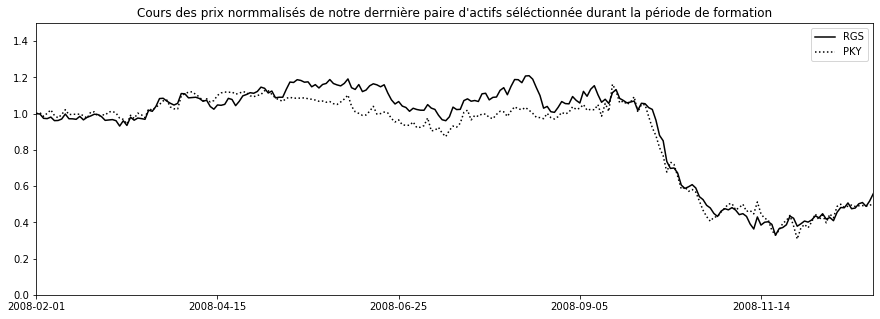

In [29]:
pf100_formation__n100.plot(figsize=(15,5), style=["k-", "k:"], ylim=(0, 1.5))
plt.title("Cours des prix normmalisés de notre derrnière paire d'actifs séléctionnée durant la période de formation")
plt.show()

# VI - __Application de la méthode des distances de Gatev et al. (2006)__

In [30]:
def positions_pairs_trading(pf, sd):
    
    ouvert = False
    long_ts = []
    
    spreads = pf.iloc[:,0]-pf.iloc[:,1]
    
    for spread in spreads:
     
        # Ouverture des positions lorsque les deux cours s'écartent de plus de 2 fois l'écart-type
        if (abs(spread) > 2*sd) and ouvert==False:
            ouvert=True
            if spread > 0:
                long = pf.columns[1]
            else:
                long = pf.columns[0]
        
        # Fermeture / maintient des positions lorsque les deux cours se croisent
        elif ouvert==True and long==pf.columns[1]:
            if spread < 0:
                ouvert = False
                long = None
        
        elif ouvert==True and long==pf.columns[0]:
            if spread > 0:
                ouvert = False
                long = None
        
        # Sinon
        else:
            long = None
        
        long_ts.append(long)
    
    pf["long_distance"] = long_ts

In [31]:
for i in range(len(liste_pf_top5)):
    positions_pairs_trading(liste_pf_top5[i], top5.iloc[i, 3])
    
for i in range(len(liste_pf_top20)):
    positions_pairs_trading(liste_pf_top20[i], top20.iloc[i, 3])
    
for i in range(len(liste_pf_top100)):
    positions_pairs_trading(liste_pf_top100[i], top100.iloc[i, 3])

In [32]:
pf100_n100.head()

,RGS,PKY,long_distance
2009-01-02,1.000000,1.000000,None
2009-01-05,1.000688,0.951801,None
2009-01-06,1.068823,1.049307,None
2009-01-07,1.036476,0.998338,None
2009-01-08,0.997247,0.997230,None


Sauvegarde des périodes de formation des actifs séléctionnés

In [33]:
for i in range(len(liste_pf_formation_top5)):
    liste_pf_formation_top5[i].to_csv(chemin+"/output/pf5_formation_n"+str(i+1)+".csv")
    
for i in range(len(liste_pf_formation_top20)):
    liste_pf_formation_top20[i].to_csv(chemin+"/output/pf20_formation_n"+str(i+1)+".csv")
    
for i in range(len(liste_pf_formation_top100)):
    liste_pf_formation_top100[i].to_csv(chemin+"/output/pf100_formation_n"+str(i+1)+".csv")

Sauvegarde des périodes de trading des actifs séléctionnés

In [34]:
for i in range(len(liste_pf_top5)):
    liste_pf_top5[i].to_csv(chemin+"/output/pf5_n"+str(i+1)+".csv")
    
for i in range(len(liste_pf_top20)):
    liste_pf_top20[i].to_csv(chemin+"/output/pf20_n"+str(i+1)+".csv")
    
for i in range(len(liste_pf_top100)):
    liste_pf_top100[i].to_csv(chemin+"/output/pf100_n"+str(i+1)+".csv")

# VII - __Application de la méthode des copules de Xie et al. (2014)__

### <span style="color:red">__/!\ ATTENTION : Le calcul des *MissPricing* est effectué sur R puis re-importé en python /!\__</span>

## Importation des données intégrants les MissPricing MI

In [41]:
for i in range(len(liste_pf_formation_top5)):
    liste_pf_formation_top5[i] = pd.read_csv(chemin+"/output/pf5_n"+str(i+1)+".csv", index_col=1).drop("Unnamed: 0",axis=1)
    
for i in range(len(liste_pf_formation_top20)):
    liste_pf_formation_top20[i] = pd.read_csv(chemin+"/output/pf20_n"+str(i+1)+".csv", index_col=1).drop("Unnamed: 0",axis=1)
    
for i in range(len(liste_pf_formation_top100)):
    liste_pf_formation_top100[i] = pd.read_csv(chemin+"/output/pf100_n"+str(i+1)+".csv", index_col=1).drop("Unnamed: 0",axis=1)

In [42]:
liste_pf_formation_top100[2]

,FOX,FOXA,long_distance,Fx,Fy,MI_X,MI_Y
X1,,,,,,,
2009-01-02,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
2009-01-05,0.997050,0.980392,NaN,0.528139,0.242424,0.999134,0.000551
2009-01-06,1.032448,1.016512,NaN,0.891775,0.887446,0.606150,0.496944
2009-01-07,0.964602,0.933953,FOXA,0.051948,0.034632,0.923916,0.044303
2009-01-08,0.954769,0.920537,FOXA,0.359307,0.320346,0.714292,0.247035
2009-01-09,0.931170,0.900929,FOXA,0.164502,0.220779,0.080122,0.885351
2009-01-12,0.901672,0.872033,FOXA,0.134199,0.147186,0.300078,0.622108
2009-01-13,0.903638,0.896801,FOXA,0.597403,0.874459,0.000524,0.999759
2009-01-14,0.860374,0.836945,FOXA,0.095238,0.056277,0.966523,0.017702


In [43]:
def position_copula_pairs_trading(df, D=0.6, S=2):
    
    FlagX = 0
    FlagY = 0
    
    invest = False
    long = None
    
    df.loc[:,"MI_X"][0] = 0
    df.loc[:,"MI_Y"][0] = 0
    
    liste_long = []
    
    for i in range(df.shape[0]):
            
        FlagX += df.loc[:, "MI_X"][i] - 0.5
        FlagY += df.loc[:, "MI_Y"][i] - 0.5
         
        # OUVERTURE
        if not invest :
            
            if FlagX >= D :
                long = "Y"
                invest = "FlagXneg"
                
            if FlagX <= -D :
                long = "X"
                invest = "FlagXpos"
                
            if FlagY >= D :
                long = "X"
                invest = "FlagYpos"
                
            if FlagY <= -D :
                long = "Y"
                invest = "FlagYneg"
                
                
        # FERMETURE
        if invest=="FlagXpos" :
            
            if FlagX <= 0 :
                
                long = None
                invest = False
                FlagX = 0
                FlagY = 0
            
            # Stop-Loss
            if FlagX >= S :
                
                long = None
                invest = False
                FlagX = 0
                FlagY = 0
                
        if invest=="FlagXneg" :
            
            if FlagX >= 0 :
                
                long = None
                invest = False
                FlagX = 0
                FlagY = 0
            
            # Stop-Loss
            if FlagX <= -S :
                
                long = None
                invest = False
                FlagX = 0
                FlagY = 0
                
        if invest=="FlagYpos" :
            
            if FlagY <= 0 :
                
                long = None
                invest = False
                FlagX = 0
                FlagY = 0
            
            # Stop-Loss
            if FlagY >= S :
                
                long = None
                invest = False
                FlagX = 0
                FlagY = 0
                
        if invest=="FlagYneg" :
            
            if FlagY >= 0 :
                
                long = None
                invest = False
                FlagX = 0
                FlagY = 0
                
            # Stop-Loss    
            if FlagY <= -S :
                
                long = None
                invest = False
                FlagX = 0
                FlagY = 0
    
        liste_long.append(long) 
    
    df["long_copule"] = liste_long
    return df

In [45]:
for i in range(len(liste_pf_formation_top5)):
    liste_pf_formation_top5[i] = position_copula_pairs_trading(liste_pf_formation_top5[i])  
for i in range(len(liste_pf_formation_top20)):
    liste_pf_formation_top20[i] = position_copula_pairs_trading(liste_pf_formation_top20[i]) 
for i in range(len(liste_pf_formation_top100)):
    liste_pf_formation_top100[i] = position_copula_pairs_trading(liste_pf_formation_top100[i])

/anaconda3/envs/pyenv/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/envs/pyenv/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [46]:
liste_pf_formation_top20[3].head(10)

,KW,ARR,long_distance,Fx,Fy,MI_X,MI_Y,long_copule
X1,,,,,,,,
2009-01-02,1.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,None
2009-01-05,0.998919,0.997819,NaN,0.242424,0.173160,0.293500,0.185068,Y
2009-01-06,0.994595,1.014177,KW,0.142857,0.982684,0.160852,0.988723,Y
2009-01-07,0.994595,1.014177,KW,0.705628,0.683983,0.694879,0.664087,Y
2009-01-08,1.010811,1.014177,KW,0.991342,0.683983,0.995722,0.465127,Y
2009-01-09,1.010811,1.018539,KW,0.705628,0.865801,0.627075,0.872260,None
2009-01-12,1.005405,1.010905,KW,0.103896,0.077922,0.177289,0.118456,None
2009-01-13,1.002162,1.019629,KW,0.181818,0.943723,0.158857,0.962129,None
2009-01-14,1.002162,1.019629,KW,0.705628,0.683983,0.694879,0.664087,None


# VIII - __Calcul des rendements__

## Rendements de la méthode des distances

In [47]:
def rendements_pair_trading_distance(pf):
    
    ouvert = False
    actif_long = None
    
    X = pf.columns[0]
    Y = pf.columns[1] 
    
    rendement_X = 0
    rendement_Y = 0
    
    rendements_PF = 0
    
    poids_X, poids_Y = 0.5, 0.5
    
    for i in np.arange(pf.shape[0]):
        
        ############
        # Ouverture des positions
        if pf["long_distance"][i]==X and not ouvert:

            ouvert = True
            actif_long = X
            
            poids_X, poids_Y = (1+rendements_PF)*poids_X, (1+rendements_PF)*poids_Y
            
            prix_X = pf[X][i]
            prix_Y = pf[Y][i]
            
            
        elif pf["long_distance"][i]==Y and not ouvert:

            ouvert = True
            actif_long = Y
            
            poids_X, poids_Y = (1+rendements_PF)*poids_X, (1+rendements_PF)*poids_Y
            
            prix_X = pf[X][i]
            prix_Y = pf[Y][i]
            
        elif actif_long==X and i== pf.shape[0] - 1:

            ouvert = False
            actif_long = None
            
            rendement_X = pf[X][i]/prix_X
            rendement_Y = pf[Y][i]/prix_Y
            
            rendements_PF = (rendement_X*poids_X - rendement_Y*poids_Y)
            
            return rendements_PF

        elif actif_long==Y and i== pf.shape[0] -1:

            ouvert = False
            actif_long = None

            rendement_X = pf[X][i]/prix_X
            rendement_Y = pf[Y][i]/prix_Y
            
            rendements_PF = (rendement_Y*poids_Y - rendement_X*poids_X)
            
            return rendements_PF
            
        ############
        # Fermeture des positions
        elif actif_long==X and pf["long_distance"][i]!=X:

            ouvert = False
            actif_long = None
            
            rendement_X = pf[X][i]/prix_X
            rendement_Y = pf[Y][i]/prix_Y
            
            rendements_PF = (rendement_X*poids_X - rendement_Y*poids_Y)
            
        elif actif_long==Y and pf["long_distance"][i]!=Y:

            ouvert = False
            actif_long = None
            
            rendement_X = pf[X][i]/prix_X
            rendement_Y = pf[Y][i]/prix_Y
            
            rendements_PF = (rendement_X*poids_X - rendement_Y*poids_Y)
 
    return rendements_PF

In [48]:
rendements_pair_trading_distance(liste_pf_formation_top20[3])

0.0002746610565695917

## Rendements de la méthode des copules

In [49]:
def rendements_pair_trading_copule(pf):
    
    ouvert = False
    actif_long = None
    
    rendement_X = 0
    rendement_Y = 0
    
    rendements_PF = 0
    
    poids_X, poids_Y = 0.5, 0.5
    
    for i in np.arange(pf.shape[0]):
        
        ############
        # Ouverture des positions
        if pf["long_copule"][i]=="X" and not ouvert:

            ouvert = True
            actif_long = "X"
            
            poids_X, poids_Y = (1+rendements_PF)*poids_X, (1+rendements_PF)*poids_Y
            
            prix_X = pf.iloc[i, 0]
            prix_Y = pf.iloc[i, 1]
            
            
        elif pf["long_copule"][i]=="Y" and not ouvert:

            ouvert = True
            actif_long = "Y"
            
            poids_X, poids_Y = (1+rendements_PF)*poids_X, (1+rendements_PF)*poids_Y
            
            prix_X = pf.iloc[i, 0]
            prix_Y = pf.iloc[i, 1]
            
        elif actif_long=="X" and i== pf.shape[0] - 1:

            ouvert = False
            actif_long = None
            
            rendement_X = pf.iloc[i, 0]/prix_X
            rendement_Y = pf.iloc[i, 1]/prix_Y
            
            rendements_PF = (rendement_X*poids_X - rendement_Y*poids_Y)
            
            return rendements_PF

        elif actif_long=="Y" and i== pf.shape[0] -1:

            ouvert = False
            actif_long = None
        
            rendement_X = pf.iloc[i, 0]/prix_X
            rendement_Y = pf.iloc[i, 1]/prix_Y
            
            
            rendements_PF = (rendement_Y*poids_Y - rendement_X*poids_X)
            
            return rendements_PF
            
        ############
        # Fermeture des positions
        elif actif_long=="X" and pf["long_copule"][i]!="X":

            ouvert = False
            actif_long = None
            
            rendement_X = pf.iloc[i, 0]/prix_X
            rendement_Y = pf.iloc[i, 1]/prix_Y
            
            rendements_PF = (rendement_X*poids_X - rendement_Y*poids_Y)
            
        elif actif_long=="Y" and pf["long_copule"][i]!="Y":

            ouvert = False
            actif_long = None
            
            rendement_X = pf.iloc[i, 0]/prix_X
            rendement_Y = pf.iloc[i, 1]/prix_Y
            
            rendements_PF = (rendement_X*poids_X - rendement_Y*poids_Y)
 
    return rendements_PF

In [50]:
rendements_pair_trading_copule(liste_pf_formation_top100[3])*10000

16.17429025588035

## Gains associés aux deux stratégies sur le top5

In [51]:
gain_copule = 0
gain_distance = 0

for i in range(len(liste_pf_formation_top5)):
    gain_copule += rendements_pair_trading_copule(liste_pf_formation_top5[i])*10000

for i in range(len(liste_pf_formation_top5)):
    gain_distance += rendements_pair_trading_distance(liste_pf_formation_top5[i])*10000
    
print("Présentation des gains associés aux deux stratégies de Pairs Trading:\nCopules : {}\nDistance : {}".format(gain_copule, gain_distance))

Présentation des gains associés aux deux stratégies de Pairs Trading:
Copules : 101.28030808598531
Distance : -540.7321708804213


## Gains associés aux deux stratégies sur le top20

In [52]:
gain_copule = 0
gain_distance = 0

for i in range(len(liste_pf_formation_top20)):
    gain_copule += rendements_pair_trading_copule(liste_pf_formation_top20[i])*10000

for i in range(len(liste_pf_formation_top20)):
    gain_distance += rendements_pair_trading_distance(liste_pf_formation_top20[i])*10000
    
print("Présentation des gains associés aux deux stratégies de Pairs Trading:\nCopules : {}\nDistance : {}".format(gain_copule, gain_distance))

Présentation des gains associés aux deux stratégies de Pairs Trading:
Copules : 1287.2878174822263
Distance : -4333.202834319054


## Gains associés aux deux stratégies sur le top100

In [53]:
gain_copule = 0
gain_distance = 0

for i in range(len(liste_pf_formation_top100)):
    gain_copule += rendements_pair_trading_copule(liste_pf_formation_top100[i])*10000

for i in range(len(liste_pf_formation_top100)):
    gain_distance += rendements_pair_trading_distance(liste_pf_formation_top100[i])*10000
    
print("Présentation des gains associés aux deux stratégies de Pairs Trading:\nCopules : {}\nDistance : {}".format(gain_copule, gain_distance))

Présentation des gains associés aux deux stratégies de Pairs Trading:
Copules : 1090.72325054973
Distance : -93512.97664093849


# IX - __Observation des ouvertures__

In [54]:
def observation_positions(pf):

    on_off_distance = []
    on_off_copule = []
    
    for i in range(pf.shape[0]):
    
        if pf["long_distance"][i] in pf.columns[:2]:
            on_off_distance.append(1)
        else:
            on_off_distance.append(0)
            
    for i in range(pf.shape[0]):
    
        if pf["long_copule"][i]!=None:
            on_off_copule.append(1)
        else:
            on_off_copule.append(0)

    on_off_distance = pd.DataFrame(on_off_distance, index=pf.index)
    on_off_copule = pd.DataFrame(on_off_copule, index=pf.index)

    if len(on_off_distance)!=0:
        plt.figure(figsize=(20,8))
        plt.subplots_adjust()
        
        plt.subplot(3,1,1)
        line_up, = plt.plot(pf.index, pf.iloc[:,0], "k-", label=pf.columns[0])
        line_down, = plt.plot(pf.index, pf.iloc[:,1], "k:", label=pf.columns[1])
        plt.title("Prix normalisés des deux actifs constituant notre paire sur la période de trading")
        plt.legend(handles=[line_up, line_down])
        plt.xticks([], [])
        
        plt.subplot(3,1,2)
        plt.plot(pf.index, on_off_distance, "k-")
        plt.title("Ouvertures définies par la méthode des distances")
        plt.xticks([], [])
        
        plt.subplot(3,1,3)
        plt.plot(pf.index, on_off_copule, "k-.")
        plt.title("Ouvertures définies par la méthode des copules")
        plt.xticks([], [])

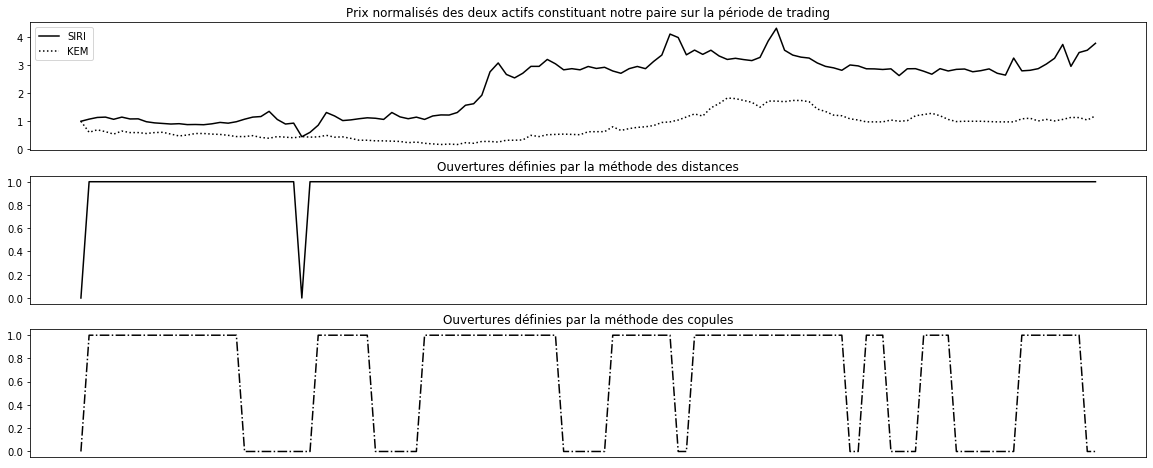

In [55]:
observation_positions(liste_pf_formation_top100[95])

In [56]:
print("Résultat de la stratégie pour la paire constitué des actifs {} et {} :".format(liste_pf_formation_top100[95].columns[0], liste_pf_formation_top100[95].columns[1]))
print("* Distance = "+str(round(rendements_pair_trading_distance(liste_pf_formation_top100[95])*100, 1))+" %"+"\n* Copule = "+str(round(rendements_pair_trading_copule(liste_pf_formation_top100[95])*100, 1))+" %")

Résultat de la stratégie pour la paire constitué des actifs SIRI et KEM :
* Distance = -144.9 %
* Copule = 31.1 %


# X - __Résultats__

In [57]:
for i in range(len(liste_pf_formation_top100)):
    if rendements_pair_trading_distance(liste_pf_formation_top100[i])<0 and rendements_pair_trading_copule(liste_pf_formation_top100[i])>0:
        print(str(i)+" == Distance : "+str(rendements_pair_trading_distance(liste_pf_formation_top100[i]))+"\tCopule : "+str(rendements_pair_trading_copule(liste_pf_formation_top100[i])))

4 == Distance : -0.02075034373755147	Copule : 0.010225174842435791
6 == Distance : -0.000987824719905106	Copule : 0.06250187941980279
7 == Distance : -0.0028525531841253615	Copule : 0.020954464693372254
10 == Distance : -0.07554510443957835	Copule : 0.05665472628690882
13 == Distance : -0.007140357525233565	Copule : 0.006066940222911321
14 == Distance : -0.15244320567243813	Copule : 0.04130288237569424
15 == Distance : -0.06251533859958336	Copule : 0.028863925319430828
23 == Distance : -0.09181874663709799	Copule : 0.0337912330004555
24 == Distance : -0.15782683276378573	Copule : 0.15448121138715254
25 == Distance : -0.07591187595888904	Copule : 0.02676399446855615
27 == Distance : -0.14715697467579603	Copule : 0.014296089126415223
29 == Distance : -0.03931727288534942	Copule : 0.027115628674137915
31 == Distance : -0.00010045786965817705	Copule : 0.010131281907358902
33 == Distance : -0.03144780349999021	Copule : 0.0356862844255359
35 == Distance : -0.039507267083467246	Copule : 0.007

In [58]:
def focus_paire(df):
    
    print("Résultat de la stratégie pour la paire constitué des actifs {} et {} :".format(df.columns[0], df.columns[1]))
    print("* Distance = "+str(round(rendements_pair_trading_distance(df)*100, 1))+" %"+"\n* Copule = "+str(round(rendements_pair_trading_copule(df)*100, 1))+" %")
    
    observation_positions(df)

Résultat de la stratégie pour la paire constitué des actifs GRT et PEI :
* Distance = -15.8 %
* Copule = 15.4 %


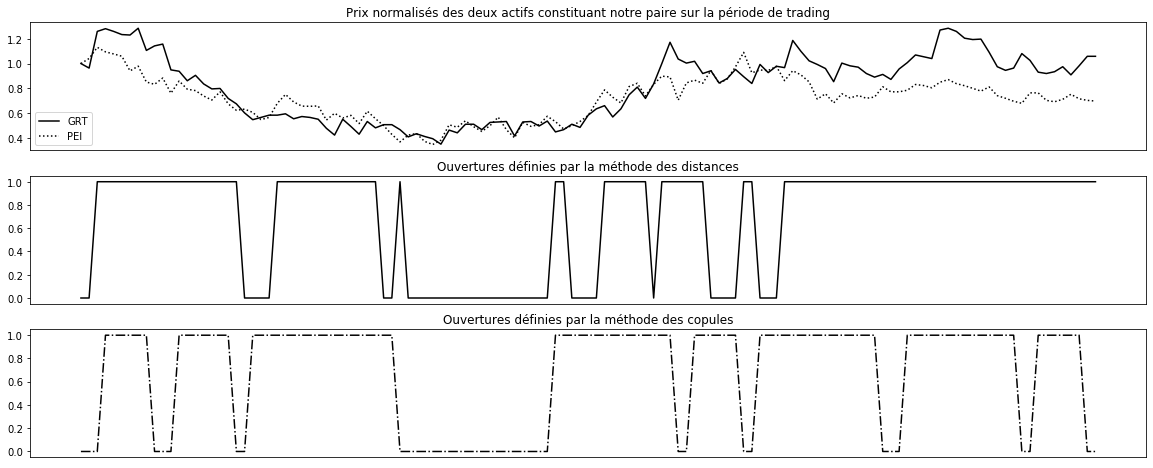

In [59]:
focus_paire(liste_pf_formation_top100[24])

Résultat de la stratégie pour la paire constitué des actifs CMCSA et CMCSK :
* Distance = -2.1 %
* Copule = 1.0 %


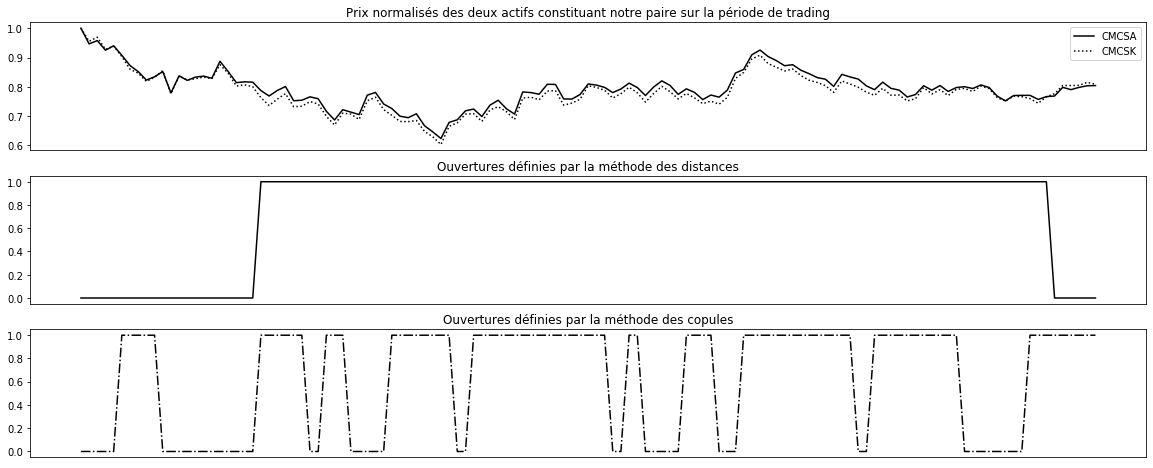

In [60]:
focus_paire(liste_pf_formation_top100[4])

Résultat de la stratégie pour la paire constitué des actifs SIRI et KEM :
* Distance = -144.9 %
* Copule = 31.1 %


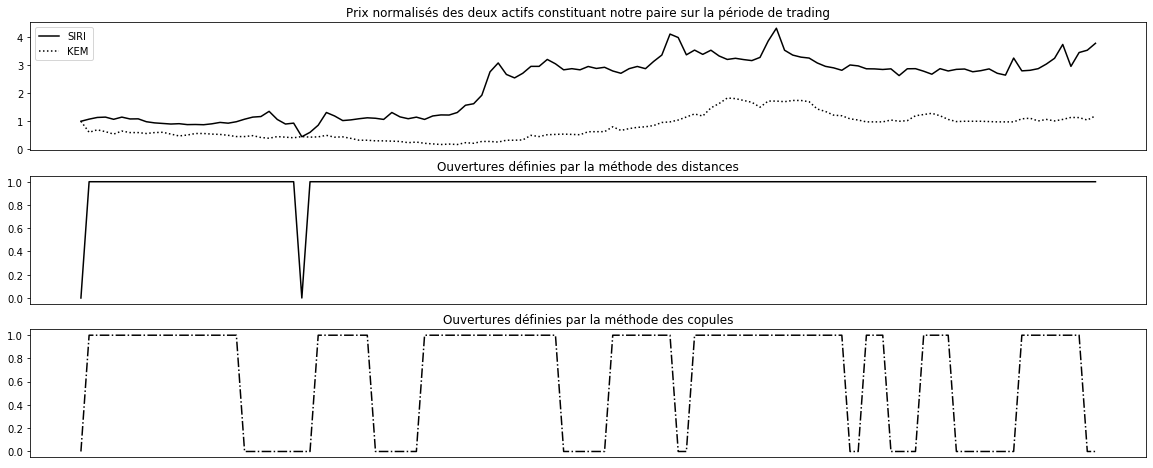

In [61]:
focus_paire(liste_pf_formation_top100[95])

Résultat de la stratégie pour la paire constitué des actifs PFG et M :
* Distance = -9.2 %
* Copule = 3.4 %


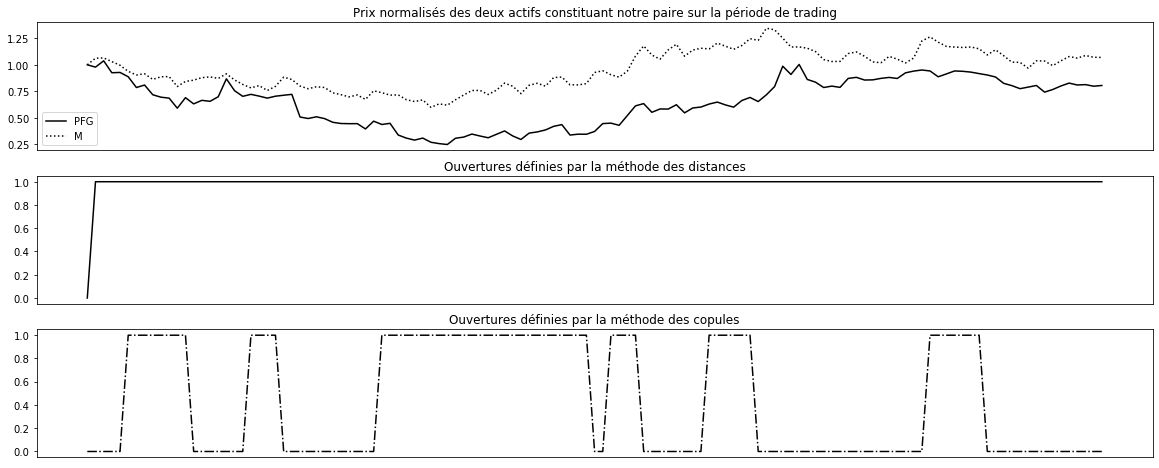

In [62]:
focus_paire(liste_pf_formation_top100[23])